In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Checking the fraud to non-fraud ratio

In this chapter, you will work on creditcard_sampledata.csv, a dataset containing credit card transactions data. Fraud occurrences are fortunately an extreme minority in these transactions.

However, Machine Learning algorithms usually work best when the different classes contained in the dataset are more or less equally present. If there are few cases of fraud, then there's little data to learn how to identify them. This is known as class imbalance, and it's one of the main challenges of fraud detection.

Let's explore this dataset, and observe this class imbalance problem.

- Import pandas as pd, read the credit card data in and assign it to df. This has been done for you.

In [2]:
# Import pandas and read csv
import pandas as pd
df = pd.read_csv("creditcard.csv")

- Use .info() to print information about df.

In [3]:
# Explore the features available in your dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

- Use .value_counts() to get the count of fraudulent and non-fraudulent transactions in the'Class' column. Assign the result to occ.

In [4]:
# Count the occurrences of fraud and no fraud and print them
occ = df['Class'].value_counts()
print(occ)

0    284315
1       492
Name: Class, dtype: int64


- Get the ratio of fraudulent transactions over the total number of transactions in the dataset.

In [5]:
# Print the ratio of fraud cases
print(occ /len(df.index))

0    0.998273
1    0.001727
Name: Class, dtype: float64


# Plotting your data

From the previous exercise we know that the ratio of fraud to non-fraud observations is very low. You can do something about that, for example by re-sampling our data, which is explained in the next video.

In this exercise, you'll look at the data and visualize the fraud to non-fraud ratio. It is always a good starting point in your fraud analysis, to look at your data first, before you make any changes to it.

Moreover, when talking to your colleagues, a picture often makes it very clear that we're dealing with heavily imbalanced data. Let's create a plot to visualize the ratio fraud to non-fraud data points on the dataset df.

The function prep_data() is already loaded in your workspace, as well as matplotlib.pyplot as plt.

- Define the plot_data(X, y) function, that will nicely plot the given feature set X with labels y in a scatter plot. This has been done for you.

In [6]:
# Define a function to create a scatter plot of our data and labels
def plot_data(X, y):
	plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
	plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
	plt.legend()
	return plt.show()

- Use the function prep_data() on your dataset df to create feature set X and labels y.

def prep_data

Use the function prep_data() on your dataset df to create feature set X and labels y.
reference define function : https://sites.pitt.edu/~naraehan/python3/user_defined_functions.html#:~:text=def%20is%20the%20keyword%20for,the%20value%20to%20be%20returned.

In [7]:
def prep_data(df: pd.DataFrame) -> (np.ndarray, np.ndarray):
    """
    Convert the DataFrame into two variable
    X: data columns (V1 - V28)
    y: lable column
    """
    X = df.iloc[:, 2:30].values
    y = df.Class.values
    return X, y

In [8]:
# Create X and y from the prep_data function 
X, y = prep_data(df)

- Run the function plot_data() on your newly obtained X and y to visualize your results.

In [9]:
# Define a function to create a scatter plot of our data and labels
def plot_data(X: np.ndarray, y: np.ndarray):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

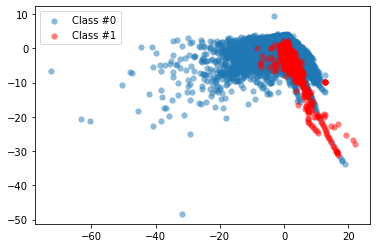

In [10]:
# Plot our data by running our plot data function on X and y
plot_data(X, y)

# Applying SMOTE

In this exercise, you're going to re-balance our data using the Synthetic Minority Over-sampling Technique (SMOTE). Unlike ROS, SMOTE does not create exact copies of observations, but creates new, synthetic, samples that are quite similar to the existing observations in the minority class. SMOTE is therefore slightly more sophisticated than just copying observations, so let's apply SMOTE to our credit card data. The dataset df is available and the packages you need for SMOTE are imported. In the following exercise, you'll visualize the result and compare it to the original data, such that you can see the effect of applying SMOTE very clearly

- Use the prep_data function on df to create features X and labels y

In [11]:
from imblearn.over_sampling import SMOTE

# Run the prep_data function
X, y = prep_data(df)

- Define the resampling method as SMOTE of the regular kind, under the variable method.

In [12]:
# Define the resampling method
method = SMOTE()

- Use .fit_resample() on the original X and y to obtain newly resampled data.

In [13]:
# Create the resampled feature set
X_resampled, y_resampled = method.fit_resample(X, y)

- Plot the resampled data using the plot_data() function.

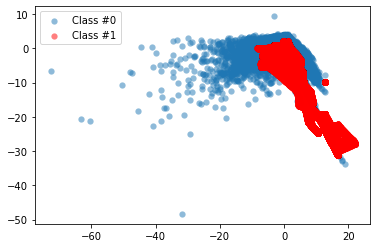

In [14]:
# Plot the resampled data
plot_data(X_resampled, y_resampled)

# Compare SMOTE to original data

In the last exercise, you saw that using SMOTE suddenly gives us more observations of the minority class. Let's compare those results to our original data, to get a good feeling for what has actually happened. Let's have a look at the value counts again of our old and new data, and let's plot the two scatter plots of the data side by side. You'll use the pre-defined function compare_plot() for that that, which takes the following arguments: X, y, X_resampled, y_resampled, method=''. The function plots your original data in a scatter plot, along with the resampled side by side.

- Print the value counts of our original labels, y. Be mindful that y is currently a Numpy array, so in order to use value counts, we'll assign y back as a pandas Series object.

In [15]:
# Print the value_counts on the original labels y
print(pd.value_counts(pd.Series(y)))

0    284315
1       492
dtype: int64


- Repeat the step and print the value counts on y_resampled. This shows you how the balance between the two classes has changed with SMOTE.

In [16]:
# Print the value_counts
print(pd.value_counts(pd.Series(y_resampled)))

0    284315
1    284315
dtype: int64


- Use the predefined compare_plot() function called on our original data as well our resampled data to see the scatterplots side by side.

In [17]:
def compare_plot(X: np.ndarray, y: np.ndarray, X_resampled: np.ndarray, y_resampled: np.ndarray, method: str):
    plt.subplot(1, 2, 1)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.title('Original Set')
    plt.subplot(1, 2, 2)
    plt.scatter(X_resampled[y_resampled == 0, 0], X_resampled[y_resampled == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X_resampled[y_resampled == 1, 0], X_resampled[y_resampled == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.title(method)
    plt.legend()
    plt.show()

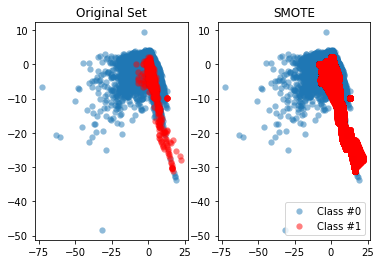

In [18]:
# Run compare_plot
compare_plot(X, y, X_resampled, y_resampled, method='SMOTE')

# Exploring the traditional way to catch fraud

- Use groupby() to group df on Class and obtain the mean of the features.

In [19]:
# Get the mean for each group
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


- Create the condition V1 smaller than -3, and V3 smaller than -5 as a condition to flag fraud cases.

# Using ML classification to catch fraud

In this exercise you'll see what happens when you use a simple machine learning model on our credit card data instead.

Do you think you can beat those results? Remember, you've predicted 22 out of 50 fraud cases, and had 16 false positives.

So with that in mind, let's implement a Logistic Regression model. If you have taken the class on supervised learning in Python, you should be familiar with this model. If not, you might want to refresh that at this point. But don't worry, you'll be guided through the structure of the machine learning model.

The X and y variables are available in your workspace.

- Split X and y into training and test data, keeping 30% of the data for testing.

In [20]:
# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

- Fit your model to your training data.

In [21]:
# Fit a logistic regression model to our data
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\atiah\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

- Obtain the model predicted labels by running model.predict on X_test.

In [22]:
# Obtain model predictions
predicted = model.predict(X_test)

- Obtain a classification comparing y_test with predicted, and use the given confusion matrix to check your results.

In [23]:
# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.88      0.61      0.72       147

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85284    12]
 [   57    90]]


# Logistic regression combined with SMOTE

- In this exercise, you're going to take the Logistic Regression model from the previous exercise, and combine that with a SMOTE resampling method. We'll show you how to do that efficiently by using a pipeline that combines the resampling method with the model in one go. First, you need to define the pipeline that you're going to use.

- Import the Pipeline module from imblearn, this has been done for you.

In [24]:
 # This is the pipeline module we need for this from imblearn
from imblearn.pipeline import Pipeline 

- Then define what you want to put into the pipeline, assign the SMOTE() method to resampling, and assign LogisticRegression() to the model.

In [25]:
# Define which resampling method and which ML model to use in the pipeline
resampling = SMOTE()
model = LogisticRegression()

- Combine two steps in the Pipeline() function. You need to state you want to combine resampling with the model in the respective place in the argument. I show you how to do this.

In [26]:
# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])

# Using a pipeline

Now that you have our pipeline defined, aka combining a logistic regression with a SMOTE method, let's run it on the data. You can treat the pipeline as if it were a single machine learning model. Our data X and y are already defined, and the pipeline is defined in the previous exercise. Are you curious to find out what the model results are? Let's give it a try!

- Split the data 'X'and 'y' into the training and test set. Set aside 30% of the data for a test set, and set the random_state to zero.

In [28]:
# Split your data X and y, into a training and a test set and fit the pipeline onto the training data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0)

- Fit your pipeline onto your training data and obtain the predictions by running the pipeline.predict() function on our X_test dataset.

In [29]:
# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data 
pipeline.fit(X_train, y_train) 
predicted = pipeline.predict(X_test)

C:\Users\atiah\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     85296
           1       0.09      0.89      0.17       147

    accuracy                           0.99     85443
   macro avg       0.55      0.94      0.58     85443
weighted avg       1.00      0.99      0.99     85443

Confusion matrix:
 [[84033  1263]
 [   16   131]]
